BASIC ARTIFICIAL NEURAL NETWORK (INTRODUCTION)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir("/content/gdrive/My Drive/project")

In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv')

In [ ]:
!ls

Aadhar	Note  Report  Resume  Scientific


In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [ ]:
print(X.head())
print(Y.head())

   CreditScore Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0          619    France  Female  ...          1               1        101348.88
1          608     Spain  Female  ...          0               1        112542.58
2          502    France  Female  ...          1               0        113931.57
3          699    France  Female  ...          0               0         93826.63
4          850     Spain  Female  ...          1               1         79084.10

[5 rows x 10 columns]
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [ ]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
classifier=Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)
print(model_history.history.keys())

Epoch 1/100
536/536 [==============================] - 14s 3ms/step - loss: 0.5822 - accuracy: 0.8038 - val_loss: 0.5415 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.7864 - val_loss: 0.5115 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4989 - accuracy: 0.8002 - val_loss: 0.4928 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4971 - accuracy: 0.7908 - val_loss: 0.4800 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4788 - accuracy: 0.7920 - val_loss: 0.4705 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4647 - accuracy: 0.7937 - val_loss: 0.4625 - val_accuracy: 0.7974
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4529 - accuracy: 0.8008 - val_loss: 0.4559 - val_accuracy: 0.800

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
print(cm)
print(score)

[[1501   94]
 [ 191  214]]
0.8575


KERAS TUNER - HYPERPARAMETER TUNING (Select no of hidden layers and other things.)

In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
!pip install keras-tuner
from kerastuner.tuners import RandomSearch

     |████████████████████████████████| 71kB 3.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78935 sha256=59620646e08decf09024b20d760a2e6114156a3c8074dce8e744d494f3f704fe
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=8123b3370f5ce5a920fd8099644a238d74baba3d8c1896f936a1926104117d63
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Keras-Tuner/main/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [ ]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

In [ ]:
### Hyperparameters:
1.No of Hidden Layers
2.No of Neurons in Hidden Layer
3.Learning rate

In [ ]:
def build_model(hp):
  model=keras.Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),activation='relu'))
  model.add(layers.Dense(1,activation='linear'))
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='mean_absolute_error',metrics=['mean_absolute_error'])
  return model


In [ ]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,executions_per_trial=3,directory='project',project_name='AIR')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 11s]
val_mean_absolute_error: nan

Best val_mean_absolute_error So Far: nan
Total elapsed time: 00h 00m 44s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in project/AIR
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 64
units_1: 352
learning_rate: 0.001
units_2: 32
units_3: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 5
units_0: 448
units_1: 288
learning_rate: 0.01
units_2: 320
units_3: 448
units_4: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 13
units_0: 256
units_1: 352
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 416
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 13
units_0: 288
units_1: 384
learning_rate: 0.0001
units_2: 512
units_3: 256
units_4: 96
units_5: 384
units_6: 256
units_7: 416
units_8: 96
units_9: 416
units_10: 64
units_11: 384
units_12: 160
Score: nan
Trial summary
Hyperparameters:
num_layers: 18
units_0: 64
units_1: 352
learning_rate: 0.01
units_2: 224
units_3: 352
units_

In [ ]:
### Hyper-parameter for Churn Modelling csv
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,BatchNormalization,Dropout
from keras.activations import relu,sigmoid

In [ ]:
def create_model(layers,activation):
  model=Sequential()
  for i,nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes,input_dim=X_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(0.3))

  model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn=create_model,verbose=0)

In [ ]:
layers=[[20],[40,20],[40,30,15]]
activations=['sigmoid','relu']
param_grid=dict(layers=layers,activation=activations,batch_size=[128,256],epochs=[30])
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid_result=grid.fit(X_train,y_train)

In [ ]:
print(grid_result.best_score_,grid_result.best_params_)

0.8551249980926514 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [40, 30, 15]}


In [ ]:
pred_y=grid.predict(X_test)
y_pred=(pred_y>0.5)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
score=accuracy_score(y_pred,y_test)

In [ ]:
print(cm,score)

[[1539  225]
 [  56  180]] 0.8595


DATA AUGMENTATION

In [ ]:
import tensorflow as tf

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
img=load_img('/content/gdrive/My Drive/project/CAT.jpg')
x=img_to_array(img)
x=x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x,batch_size=1,save_to_dir='project',save_prefix='cat',save_format='jpg'):
  i += 1
  if i>20:
    break

CREATE CNN MODEL AND OPTIMIZE USING KERAS TUNER

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 5.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78935 sha256=bd8a639979ff69d68b8e2be2172df67d261e13f9e473f4de0b1b943d6e2c62bb
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=d020bfef8c1351fe23634f7d9228ad7a17e26794feb2deeadcae0b705af5bd7c
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
##scale down images from 255 i.e. grayscale to 0-1 for less computation
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
train_images[0].shape

(28, 28, 1)

In [ ]:
def build_model(hp):
  model=keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
            kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
            activation='relu',
            input_shape=(28,28,1)
        ),
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter',min_value=32,max_value=64,step=16),
            kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
            activation='relu',
        ),
        keras.layers.Flatten(),
        keras.layers.Dense(units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
        activation='relu'
        ),
        keras.layers.Dense(10,activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters 

In [ ]:
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project',project_name='MNIST')

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 21s]
val_accuracy: 0.8418333530426025

Best val_accuracy So Far: 0.9096666574478149
Total elapsed time: 00h 02m 23s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_search.results_summary()

Results summary
Results in project/MNIST
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 112
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 48
learning_rate: 0.001
Score: 0.9096666574478149
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 64
learning_rate: 0.001
Score: 0.9058333039283752
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 32
learning_rate: 0.001
Score: 0.9049999713897705
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 48
learning_rate: 0.01
Score: 0.8508333563804626
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 3
dense_1_units: 96
learning_rate: 0.01
Score: 0.8418333530426025


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 48)        134448    
_________________________________________________________________
flatten (Flatten)            (None, 23232)             0         
_________________________________________________________________
dense (Dense)                (None, 48)                1115184   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                490       
Total params: 1,251,242
Trainable params: 1,251,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images,train_labels,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1523 - accuracy: 0.9429 - val_loss: 0.2423 - val_accuracy: 0.9152
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1141 - accuracy: 0.9573 - val_loss: 0.2799 - val_accuracy: 0.9117
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0858 - accuracy: 0.9675 - val_loss: 0.3070 - val_accuracy: 0.9155
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0638 - accuracy: 0.9762 - val_loss: 0.3682 - val_accuracy: 0.9163
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0496 - accuracy: 0.9810 - val_loss: 0.4245 - val_accuracy: 0.9122
Epoch 9/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0433 - accuracy: 0.9845 - val_loss: 0.4426 - val_accuracy: 0.9072
Epoch 10/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0324 - accuracy: 0.9881 - val_loss: 0.5134 - val_accuracy

TRANSFER LEARNING

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=[224,224]
train_path='dataset/train'
valid_path='dataset/val'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
folders=glob('dataset/train/*')

In [ ]:
print(folders)

['dataset/train/jerry_seinfeld', 'dataset/train/mindy_kaling', 'dataset/train/madonna', 'dataset/train/elton_john', 'dataset/train/ben_afflek']


In [ ]:
x=Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)

In [ ]:
print(prediction)

KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), name='dense/Softmax:0', description="created by layer 'dense'")


In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/val',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [ ]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
3/3 [==============================] - 56s 13s/step - loss: 2.2380 - accuracy: 0.1623 - val_loss: 2.8654 - val_accuracy: 0.2000
Epoch 2/5
3/3 [==============================] - 1s 490ms/step - loss: 2.1683 - accuracy: 0.2990 - val_loss: 1.6623 - val_accuracy: 0.5200
Epoch 3/5
3/3 [==============================] - 1s 461ms/step - loss: 1.1141 - accuracy: 0.6580 - val_loss: 1.5742 - val_accuracy: 0.5200
Epoch 4/5
3/3 [==============================] - 1s 481ms/step - loss: 0.7071 - accuracy: 0.7554 - val_loss: 0.9615 - val_accuracy: 0.6400
Epoch 5/5
3/3 [==============================] - 1s 459ms/step - loss: 0.5430 - accuracy: 0.8240 - val_loss: 0.8593 - val_accuracy: 0.5600


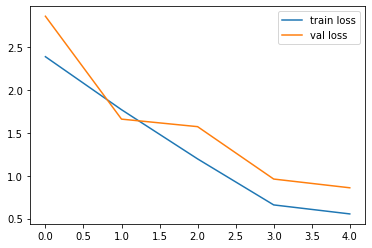

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

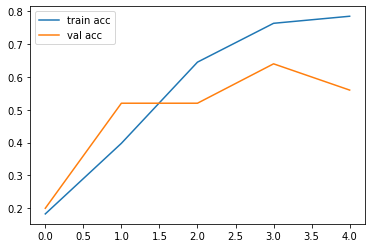

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import load_model

In [ ]:
model.save('facerecog.h5')

WORD EMBEDDING TECHNIQUES USING EMBEDDING LAYER IN KERAS

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
sent=['the glass of milk',
      'the glass of juice',
      'the cup of tea',
      'I am a good boy',
      'I am a good developer',
      'understand the meaning of words',
      'your videos are good']

In [ ]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [ ]:
voc_size=10000

In [ ]:
##ONE HOT REPRESENTATION
onehot_repr=[one_hot(words,voc_size)for words in sent]
print(onehot_repr)

[[5547, 6277, 1995, 4609], [5547, 6277, 1995, 8053], [5547, 2691, 1995, 198], [7149, 373, 2368, 9636, 1425], [7149, 373, 2368, 9636, 1852], [2598, 5547, 8132, 1995, 2712], [8916, 2051, 9968, 9636]]


In [ ]:
##WORD EMBEDDING REPRESENTATION
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
import numpy as np

In [ ]:
sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0 5547 6277 1995 4609]
 [   0    0    0    0 5547 6277 1995 8053]
 [   0    0    0    0 5547 2691 1995  198]
 [   0    0    0 7149  373 2368 9636 1425]
 [   0    0    0 7149  373 2368 9636 1852]
 [   0    0    0 2598 5547 8132 1995 2712]
 [   0    0    0    0 8916 2051 9968 9636]]


In [ ]:
dim=15

In [ ]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam','mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 10)             100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.predict(embedded_docs))

[[[ 1.1734009e-02 -1.4326323e-02 -3.0244028e-02 -8.7974295e-03
   -3.4906756e-02 -3.7294041e-02 -6.5761916e-03  5.4777749e-03
   -3.2419790e-02  3.1660449e-02]
  [ 1.1734009e-02 -1.4326323e-02 -3.0244028e-02 -8.7974295e-03
   -3.4906756e-02 -3.7294041e-02 -6.5761916e-03  5.4777749e-03
   -3.2419790e-02  3.1660449e-02]
  [ 1.1734009e-02 -1.4326323e-02 -3.0244028e-02 -8.7974295e-03
   -3.4906756e-02 -3.7294041e-02 -6.5761916e-03  5.4777749e-03
   -3.2419790e-02  3.1660449e-02]
  [ 1.1734009e-02 -1.4326323e-02 -3.0244028e-02 -8.7974295e-03
   -3.4906756e-02 -3.7294041e-02 -6.5761916e-03  5.4777749e-03
   -3.2419790e-02  3.1660449e-02]
  [ 1.2288012e-02  3.7339222e-02  4.5571316e-02  4.6263907e-02
   -4.0942598e-02 -9.3909353e-04 -3.2111406e-03 -2.7257299e-02
   -4.1330695e-02 -1.3679124e-02]
  [-2.0506931e-02  1.1430182e-02  3.7942614e-02 -2.5844289e-02
   -5.1364414e-03 -1.3756383e-02 -1.2068726e-02  2.7852777e-02
   -4.1085064e-02 -2.9472543e-02]
  [ 2.1698441e-02  2.6917458e-04  3.2615

In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0, 5547, 6277, 1995, 4609], dtype=int32)

In [ ]:
print(model.predict(embedded_docs)[0])

[[ 0.01173401 -0.01432632 -0.03024403 -0.00879743 -0.03490676 -0.03729404
  -0.00657619  0.00547777 -0.03241979  0.03166045]
 [ 0.01173401 -0.01432632 -0.03024403 -0.00879743 -0.03490676 -0.03729404
  -0.00657619  0.00547777 -0.03241979  0.03166045]
 [ 0.01173401 -0.01432632 -0.03024403 -0.00879743 -0.03490676 -0.03729404
  -0.00657619  0.00547777 -0.03241979  0.03166045]
 [ 0.01173401 -0.01432632 -0.03024403 -0.00879743 -0.03490676 -0.03729404
  -0.00657619  0.00547777 -0.03241979  0.03166045]
 [ 0.01228801  0.03733922  0.04557132  0.04626391 -0.0409426  -0.00093909
  -0.00321114 -0.0272573  -0.0413307  -0.01367912]
 [-0.02050693  0.01143018  0.03794261 -0.02584429 -0.00513644 -0.01375638
  -0.01206873  0.02785278 -0.04108506 -0.02947254]
 [ 0.02169844  0.00026917  0.03261559 -0.04274068 -0.04244999  0.00846313
   0.04834426 -0.03627846  0.04193157  0.03364607]
 [-0.01233854 -0.00426407 -0.02616835  0.03913279 -0.03178586  0.03449887
   0.03811386  0.03860864 -0.02748511  0.03011885]]

In [ ]:
import os
import glob
import cv2

In [ ]:
from google.colab.patches import cv2_imshow
inputFolder='Scientific'
folderlen = len(inputFolder)
os.mkdir('scientific4')
for img in glob.glob(inputFolder+"/*.jpg"):
  image = cv2.imread(img)
  imgresized = cv2.resize(image,(224,224))
  cv2.imwrite("scientific4"+img[folderlen:],imgresized)

In [ ]:
folderlen

10

In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('Tobacco3482-jpg/Resume/50721981-1982.jpg').convert('RGB')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


[[0.999542  0.0004575 0.0000001 0.0000003]]


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 4)                 128500    
Total params: 538,708
Trainable params: 524,628
Non-trainable params: 14,080
_________________________________________________________________
